# Import RPB model along with other utility functions

In [1]:
from RPB_model import *

expression symbols from pyomo.core.expr  (deprecated in 6.6.2.dev0) (called
from <frozen importlib._bootstrap>:241)


# Creating model for a single side/section of the RPB

In [ ]:
# Create model instance. Currently, mode can be either "adsorption" or "desorption" which sets the boundary conditions for each case.
# m=RPB_model(mode="adsorption")
# or
m=RPB_model(mode="adsorption", gas_flow_direction=1)

# Custom initialization routine. Uses a homotopy routine to adjust the initialization factors so that all equations are 'active'.
single_section_init(m)
# homotopy_init_routine(m)

In [ ]:
list(m.z)

In [ ]:
# Plotting the results/profiles

plotting(m)

In [ ]:
# Some various utility functions that I have been using to check model performance
evaluate_MB_error(m)

print(f'CO2 Capture = {m.CO2_capture():.3}')

check_scaling(m)

# degen_hunter(m)

# jac, variables, constraints = scaling_script(m)

In [ ]:
variables[3870].pprint()

In [ ]:
constraints[4076].pprint()

In [ ]:
print(jac.getcol(2921))

# Creating a full RPB model

In [2]:
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")
init_routine_1(RPB)

Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation

In [3]:
fix_capture_and_solve(RPB, capture=0.95)

component keys that are not exported as part of the NL file.  Skipping.
component keys that are not exported as part of the NL file.  Skipping.
Ipopt 3.13.2: max_iter=1000
bound_push=1e-22


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of th

In [4]:
report(RPB)

,Value,Doc,Fixed
ads.L,3.000000,Bed Length [m],True
ads.D,10.000000,Bed diameter [m],True
ads.w_rpm,1.000000,bed rotational speed [revolutions/min],True
ads.theta,0.500000,Fraction of bed [-],True
des.theta,0.500000,Fraction of bed [-],False
ads.P_in,1.018203,Inlet flue gas pressure [bar],False
ads.P_out,1.013250,Outlet adsorber pressure [bar],True
ads.F_in,33.212347,Inlet adsorber gas flow [mol/s],False
ads.Tg_in,363.000000,Inlet flue gas temperature [K],True
ads.Tx,363.000000,"heat exchange fluid temperature, constant [K]",True


In [5]:
evaluate_MB_error(RPB.ads)

N2 error = -4.44e-14 %
CO2 error = 1.34 %
H2O error = -5.55e-14 %


In [ ]:
check_scaling(RPB)

In [ ]:
jac, variables, constraints = scaling_script(RPB)

# Save and load model

In [ ]:
# save model
to_json(RPB, fname="counter current base case 090823.json.gz", gz=True, human_read=False)

In [ ]:
# create model, load, and solve
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

from_json(RPB, fname="counter current base case 090823.json.gz", gz=True)

solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-22,
    # "halt_on_ampl_error": "yes",
}
solver.solve(RPB, tee=True).write()

Optimization Testing

In [ ]:
# create regularization parameter for the objective function
RPB.alpha_obj = Param(initialize=0.9, mutable=True)

# add objective
@RPB.Expression()
def obj(RPB):
    return RPB.alpha_obj * RPB.energy_requirement/10 - (1 - RPB.alpha_obj) * RPB.productivity/20

RPB.objective = Objective(expr=RPB.obj)

In [ ]:
RPB.ads.L.setlb(0.5)
RPB.ads.L.setub(10)
RPB.ads.L.pprint()

In [ ]:
RPB.ads.Tx.setlb(25+273)
RPB.ads.Tx.setub(95+273)
RPB.ads.Tx.pprint()

In [ ]:
RPB.des.Tx.setlb(100+273)
RPB.des.Tx.setub(160+273)
RPB.des.Tx.pprint()

In [ ]:
RPB.des.P_in.setub(1.15)
RPB.des.P_in.setlb(1.075)
RPB.des.P_in.pprint()

In [ ]:
degrees_of_freedom(RPB)

In [ ]:
RPB.ads.w_rpm.setlb(0.5)
RPB.ads.w_rpm.setub(5)
RPB.ads.w_rpm.pprint()

In [ ]:
# free up decision variables
RPB.ads.L.unfix()
RPB.ads.theta.unfix()
RPB.des.P_in.unfix()
RPB.ads.Tx.unfix()
RPB.des.Tx.unfix()

In [ ]:
degrees_of_freedom(RPB)

In [ ]:
# solve
solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-8,
    # "halt_on_ampl_error": "yes",
    "tol": 1e-4,
    "max_cpu_time": 5*60,
    # "mu_strategy": "adaptive",
}
solver.solve(RPB, tee=True).write()

In [ ]:
report(RPB)

In [ ]:
[RPB.ads.qCO2_eq[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

In [ ]:
RPB.ads.Tx()

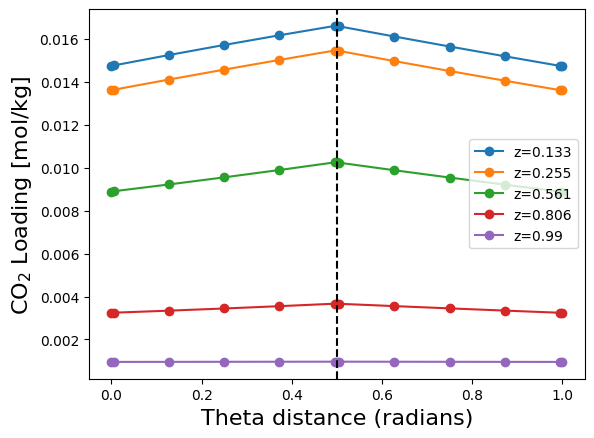

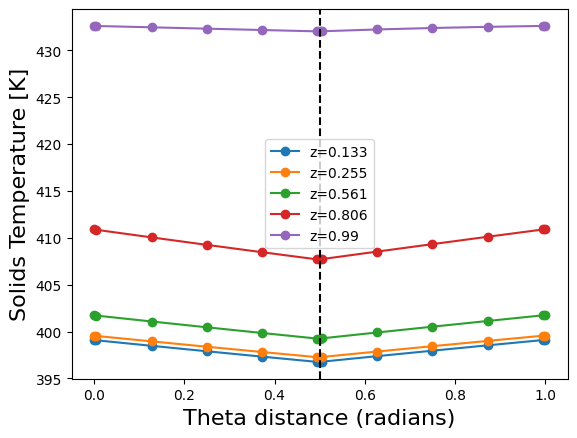

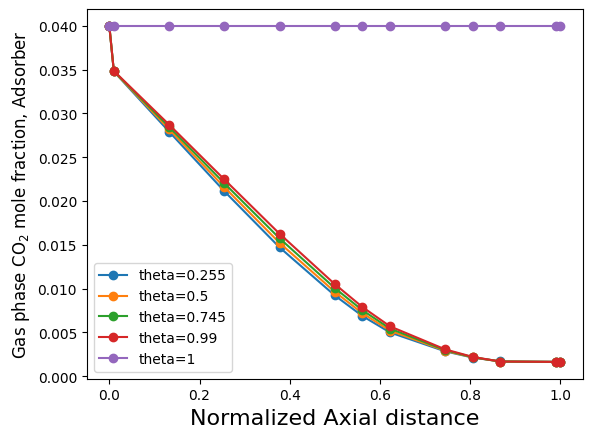

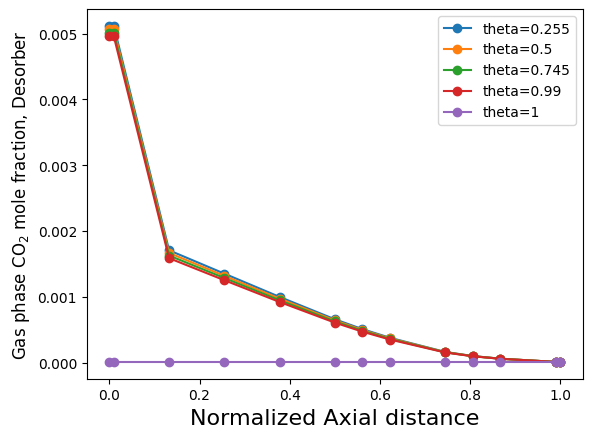

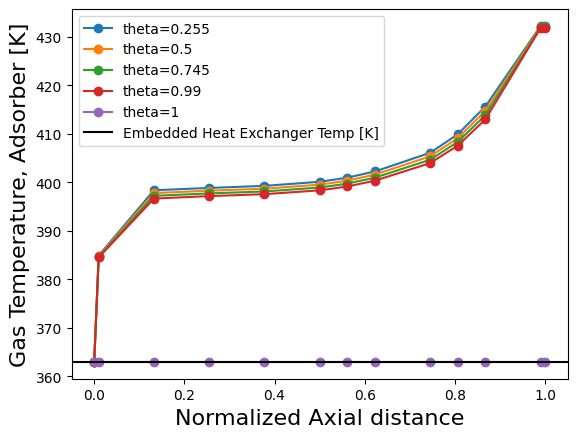

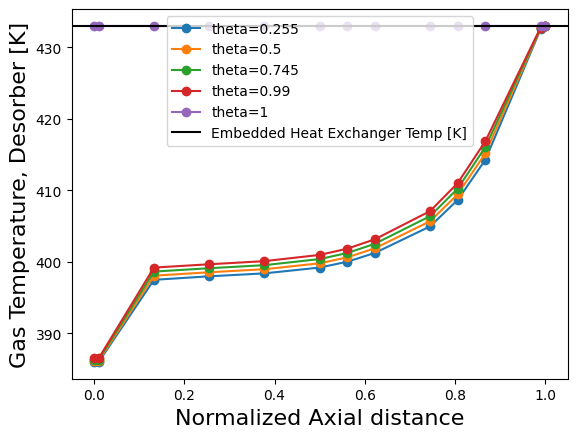

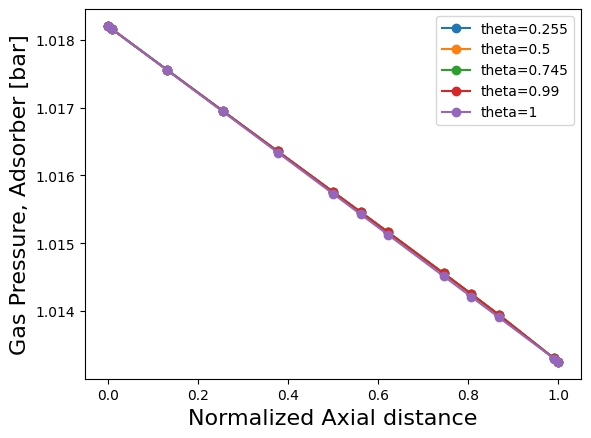

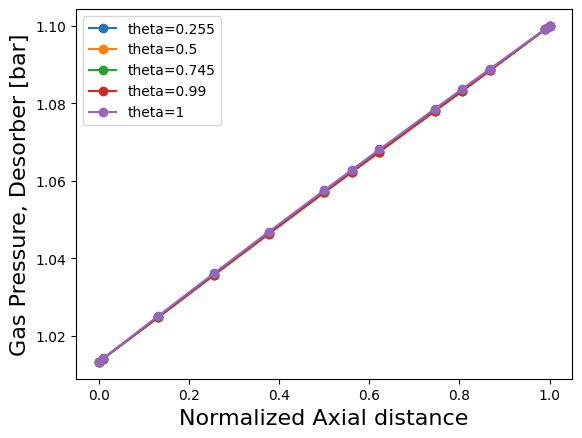

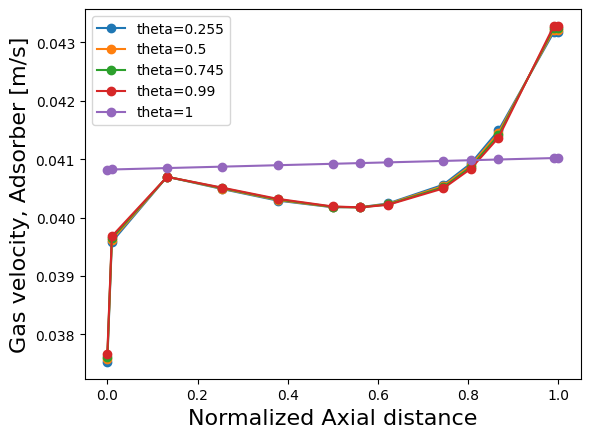

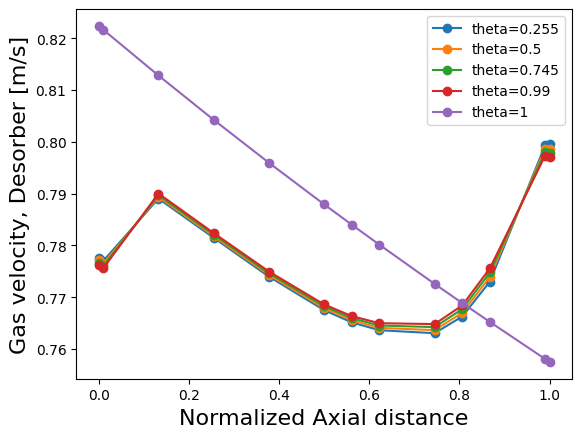

In [6]:
full_contactor_plotting(RPB)

In [ ]:
RPB.ads.Q_ghx_tot_kW()

In [ ]:
list(RPB.ads.z)